# Plateau plot

In [1]:
import pathlib

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Setting parameters

Documentation of parameters:

| Parameter                  | Description                                             |
| -------------------------- | --------------------------------------------------------|  
| Default paths: |      |
| `DATA_DIR`  | (pathlib.Path)  path to `data/` directory                               |
| `OUPUT_RESULTS_DIR` | (pathlib.Path) path to `results/` directory |
| `OUPUT_FIGURES_DIR` | (pathlib.Path) path to `figures/` directory |
| Inputs: | |
| `DATA1_NAME` | (str) unique name associated with DATA1 |
| `DATA1_PATH` | (pathlib.Path) path to data 1 file  |
| `DATA2_NAME` | (str) unique name associated with DATA2 | 
| `DATA2_PATH` | (pathib.Path) path to data 2 file|
| Analysis Params: | |
| `ONLY_OVERLAPING_FEATURES` | (bool) Only take account of overlapping features (default=False)|

In [2]:

# setting paths
DATA_DIR = pathlib.Path("../data/").resolve(strict=True) 
OUPUT_RESULTS_DIR = pathlib.Path("../results/").resolve(strict=True)
OUPUT_FIGURES_DIR = pathlib.Path("../figures/").resolve(strict=True)

# setting data names and paths
DATA1_NAME = "normal_data1"
DATA1_PATH = DATA_DIR / "test_df.csv.gz"

DATA2_NAME = "normal_data2"
DATA2_PATH = DATA_DIR / "test_df.csv.gz"

# analysis paramters
ONLY_OVERLAPING_FEATURES = False


## running analysis 

In [3]:
# loading in matrix 
df1 = pd.read_csv(DATA1_PATH)
df2 = pd.read_csv(DATA2_PATH)

### Selecting feature names

In [4]:
# checking their shapes and see if they are equal amount of features
df1_nfeatures = len(df1.columns)
df2_nfeatures = len(df2.columns)

# setting features names
feature_names = list(set(df1.columns) & set(df2.columns))

# raise an error if there is a mismatch of number of features names
if df1_nfeatures != df2_nfeatures and ONLY_OVERLAPING_FEATURES is False:
    raise ValueError("Mismatch number of features: data1: {df1_nfetures} data2: {df2_nfetures}")

# if only select over lapping features
if df1_nfeatures != df2_nfeatures and ONLY_OVERLAPING_FEATURES is True:
    
    # only select intersecting feature names and update features 
    feature_names = list(set(df1.columns) & set(df2.columns))

### calculate per value differences 

In [5]:
# substract per value basis 
compared_df = df1[feature_names] - df2[feature_names]

# sum feature differences along index axis and calculate absolute values
diff_values_series = compared_df.sum(axis=0).abs()


# computer average difference 
avg_diff = np.mean(diff_values_series, axis=0)
print(f"average value diff across all features is: {avg_diff}")

average value diff across all features is: 0.0


## Creating Plateau Plot

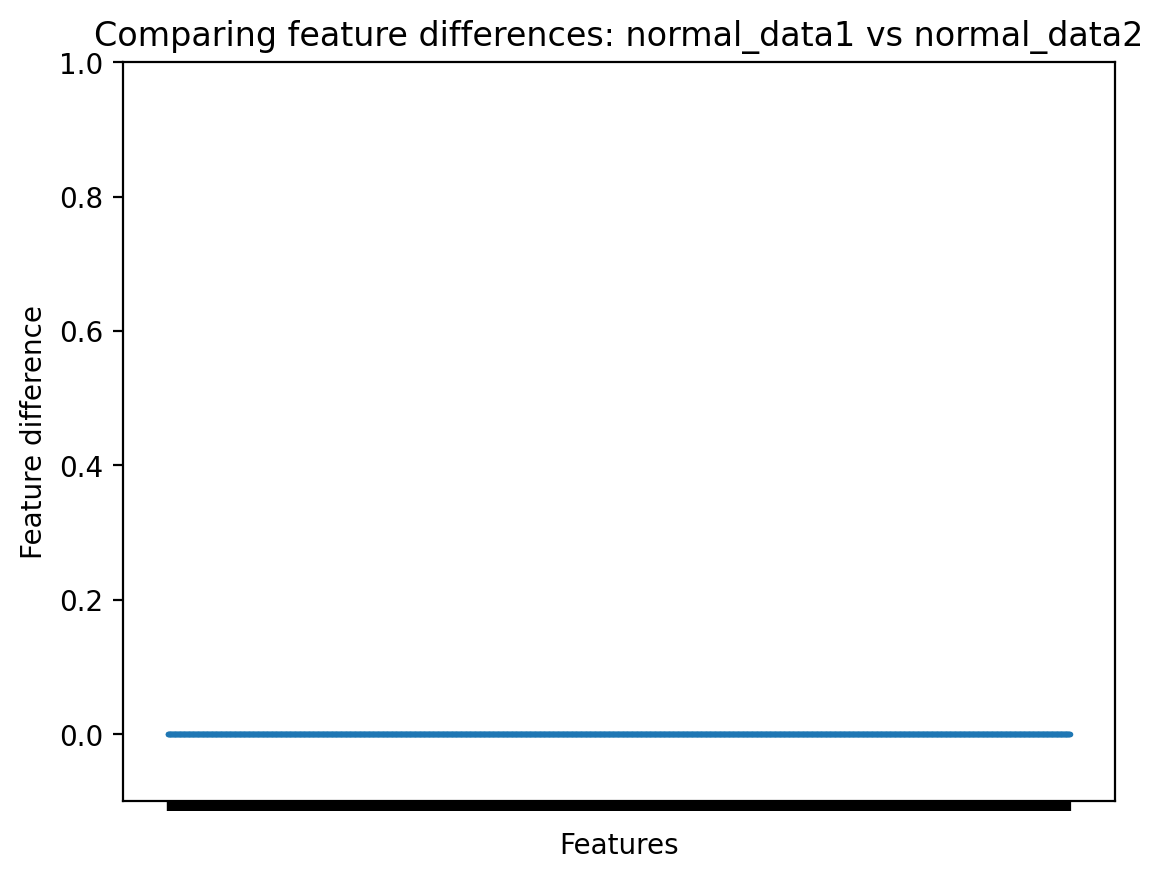

In [6]:
# figure settings
plt.figure(dpi=200)

# lavel settings
plt.title(f"Comparing feature differences: {DATA1_NAME} vs {DATA2_NAME}")
plt.ylabel("Feature difference")
plt.xlabel("Features")

# axis settings

# setting max y value with 10% padding
max_y = max(diff_values_series) * 1.1 
if max_y == 0.0:
    max_y = max_y + 1.0
plt.ylim(-0.1, max_y)

# remove feature names from x-labels
plt.gca().set_xticklabels([])

# plotting
plt.scatter(x=diff_values_series.index, y=diff_values_series.values, s=1);